Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,137,986 (80.64 MB)

 Trainable params: 6,423,298 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Cloning into 'observations'...
remote: Enumerating objects: 1638, done.
remote: Total 1638 (delta 0), reused 0 (delta 0), pack-reused 1638 (from 1)
Receiving objects: 100% (1638/1638), 75.94 MiB | 15.49 MiB/s, done.
Resolving deltas: 100% (19/19), done.
Found 1101 images belonging to 2 classes.
Found 275 images belonging to 2 classes.
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


35/35 ━━━━━━━━━━━━━━━━━━━━ 37s 667ms/step - accuracy: 0.8097 - loss: 0.4129 - val_accuracy: 0.9818 - val_loss: 0.0516
Epoch 2/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 12s 174ms/step - accuracy: 0.9909 - loss: 0.0389 - val_accuracy: 0.9855 - val_loss: 0.0351
Epoch 3/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 157ms/step - accuracy: 0.9936 - loss: 0.0182 - val_accuracy: 0.9891 - val_loss: 0.0338
Epoch 4/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 161ms/step - accuracy: 1.0000 - loss: 0.0083 - val_accuracy: 0.9818 - val_loss: 0.0383
Epoch 5/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 153ms/step - accuracy: 1.0000 - loss: 0.0052 - val_accuracy: 0.9855 - val_loss: 0.0361
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms

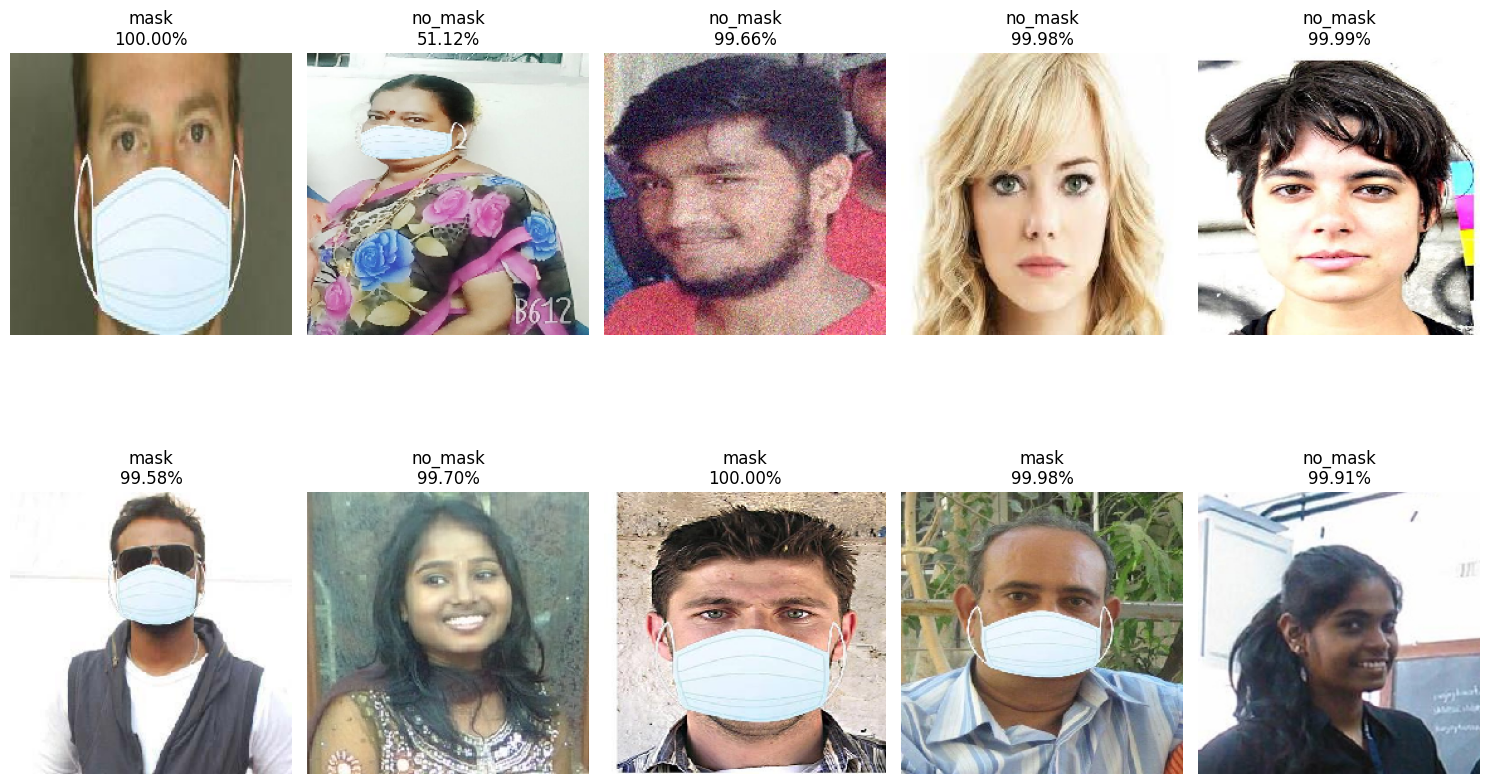

In [3]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import numpy as np
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# =========================================
# Step 1: 建立 VGG16 預訓練模型
# =========================================
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # 修改為 2 個類別
])

base_model.trainable = False  # 凍結預訓練層

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# =========================================
# Step 2: 複製並預處理資料集
# =========================================
# 下載公開的口罩數據集
!git clone https://github.com/prajnasb/observations.git
os.makedirs("dataset/train/mask", exist_ok=True)
os.makedirs("dataset/train/no_mask", exist_ok=True)

import shutil
mask_path = "observations/experiements/data/with_mask"
no_mask_path = "observations/experiements/data/without_mask"

for img in os.listdir(mask_path):
    shutil.move(os.path.join(mask_path, img), "dataset/train/mask")

for img in os.listdir(no_mask_path):
    shutil.move(os.path.join(no_mask_path, img), "dataset/train/no_mask")

# 使用 ImageDataGenerator 處理數據
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training')

val_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

# =========================================
# Step 3: 訓練模型
# =========================================
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=5)

# =========================================
# Step 4: 從資料集中隨機選擇10張圖片並分類
# =========================================
def predict_and_show_random_images(model, dataset_path, class_names, num_images=10):
    all_images = []
    for root, _, files in os.walk(dataset_path):
        for file in files:
            if file.endswith(('jpg', 'jpeg', 'png')):
                all_images.append(os.path.join(root, file))

    # 隨機選擇 num_images 張圖片
    selected_images = random.sample(all_images, num_images)

    plt.figure(figsize=(15, 10))
    for i, img_path in enumerate(selected_images):
        # 預處理圖片
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # 預測類別
        predictions = model.predict(img_array)
        predicted_class = class_names[np.argmax(predictions)]
        confidence = np.max(predictions) * 100

        # 顯示圖片與預測結果
        plt.subplot(2, 5, i+1)
        plt.imshow(img)
        plt.title(f"{predicted_class}\n{confidence:.2f}%")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# 測試: 從訓練資料夾中選10張圖片
class_names = list(train_generator.class_indices.keys())  # 獲取類別名稱
predict_and_show_random_images(model, "dataset/train", class_names, num_images=10)
